In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('dssalry_report.csv') #read in file 

In [3]:
ds.head() #display first 5 rows of table 



,int64_field_0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,38,2020,EN,FT,Data Analyst,10000,NG,100,NG,S
1,52,2020,EN,FT,AI Scientist,45896,DK,50,DK,S
2,130,2021,EN,FT,Machine Learning Developer,100000,IQ,50,IQ,S
3,153,2021,EN,FT,Data Scientist,13400,UA,100,UA,L
4,191,2021,EN,FT,Machine Learning Engineer,21844,CO,50,CO,M


In [4]:
ds.describe() #quick statistical summary 


,int64_field_0,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.000000,607.00000
mean,303.000000,2021.405272,112297.869852,70.92257
std,175.370085,0.692133,70957.259411,40.70913
min,0.000000,2020.000000,2859.000000,0.00000
25%,151.500000,2021.000000,62726.000000,50.00000
50%,303.000000,2022.000000,101570.000000,100.00000
75%,454.500000,2022.000000,150000.000000,100.00000
max,606.000000,2022.000000,600000.000000,100.00000


In [5]:
#counts for categorical data 
ds['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [98]:
ds['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Data Analytics Manager                        7
AI Scientist                                  7
Director of Data Science                      7
Principal Data Scientist                      7
Data Science Consultant                       7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Applied Data Scientist                        5
Business Data Analyst                   

Text(0, 0.5, 'Jobs')

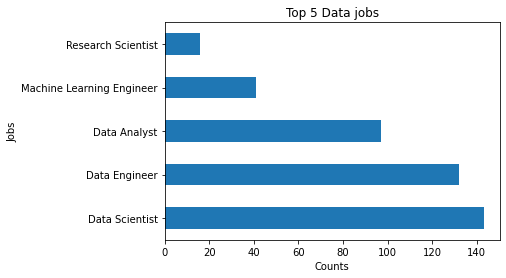

In [9]:
ds['job_title'].value_counts()[:5].plot(kind='barh') #this makes a bar graph 
plt.title('Top 5 Data jobs')
plt.xlabel('Counts', color = 'black', fontsize='10', horizontalalignment='center')
plt.ylabel('Jobs', color = 'black', fontsize='10', horizontalalignment='center')

In [6]:
#change the column salary_in_us_currency to just salary 
#ds = ds.drop(['int64_field_0'], axis=1)
#in{}, put which column you want to change, a :, then the name you want to rename to 
ds.rename(columns = {'salary_in_usd':'Salary'}, inplace = True) 
ds.head()

,int64_field_0,work_year,experience_level,employment_type,job_title,Salary,employee_residence,remote_ratio,company_location,company_size
0,38,2020,EN,FT,Data Analyst,10000,NG,100,NG,S
1,52,2020,EN,FT,AI Scientist,45896,DK,50,DK,S
2,130,2021,EN,FT,Machine Learning Developer,100000,IQ,50,IQ,S
3,153,2021,EN,FT,Data Scientist,13400,UA,100,UA,L
4,191,2021,EN,FT,Machine Learning Engineer,21844,CO,50,CO,M


In [9]:
print(ds.nunique())

int64_field_0         607
work_year               3
experience_level        4
employment_type         4
job_title              50
Salary                369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64


In [10]:
ds.shape

(607, 10)

In [11]:
 #data cleaning process; check to see if there are any null values within the columns
#if there were, we would have to do some data transformation 
ds.isnull().sum()

int64_field_0         0
work_year             0
experience_level      0
employment_type       0
job_title             0
Salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
#quick statistical summary
ds.describe()

,int64_field_0,work_year,Salary,remote_ratio
count,607.000000,607.000000,607.000000,607.00000
mean,303.000000,2021.405272,112297.869852,70.92257
std,175.370085,0.692133,70957.259411,40.70913
min,0.000000,2020.000000,2859.000000,0.00000
25%,151.500000,2021.000000,62726.000000,50.00000
50%,303.000000,2022.000000,101570.000000,100.00000
75%,454.500000,2022.000000,150000.000000,100.00000
max,606.000000,2022.000000,600000.000000,100.00000


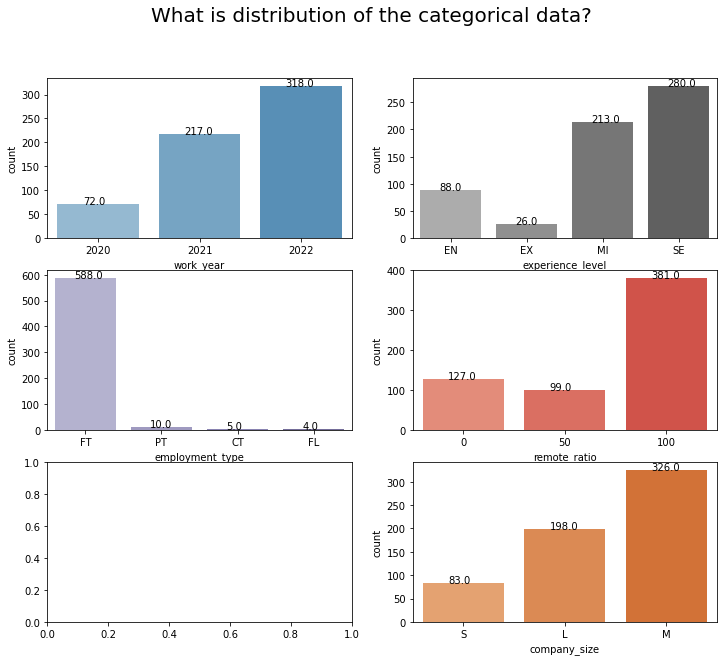

In [3]:
#Univaruiate Analysis
#analysis on each variable individually

figure, axes=plt.subplots(3,2,figsize=(12,10)) #3 is 3 plots vertical and 2 is 2 plots horizontally 
pl1 = sns.countplot(ax = axes[0,0], data=ds, x="work_year", palette = sns.color_palette('Blues_d')) 
pl2 = sns.countplot(ax = axes[0,1], data=ds, x="experience_level", palette = sns.color_palette('Greys_d'))
pl3 = sns.countplot(ax = axes[1,0], data=ds, x="employment_type", palette = sns.color_palette('Purples_d'))
pl4 = sns.countplot(ax = axes[1,1], data=ds, x="remote_ratio", palette = sns.color_palette('Reds_d'))
pl5 = sns.countplot(ax = axes[2,1], data=ds, x="company_size", palette = sns.color_palette('Oranges_d'))

#display counts on top of bars on graphs 
for i in pl1.patches:
    pl1.annotate('{:.1f}'.format(i.get_height()), (i.get_x() + 0.25, i.get_height() + 0.01))
for i in pl2.patches:
    pl2.annotate('{:.1f}'.format(i.get_height()), (i.get_x() + 0.25, i.get_height() + 0.01))
for i in pl3.patches:
    pl3.annotate('{:.1f}'.format(i.get_height()), (i.get_x() + 0.25, i.get_height() + 0.01))
for i in pl4.patches:
    pl4.annotate('{:.1f}'.format(i.get_height()), (i.get_x() + 0.25, i.get_height() + 0.01))
for i in pl5.patches:
    pl5.annotate('{:.1f}'.format(i.get_height()), (i.get_x() + 0.25, i.get_height() + 0.01))
figure.suptitle("What is distribution of the categorical data?", fontsize=20)
plt.show()
#https://www.codecademy.com/article/seaborn-design-ii refer to this site for help with sns color palette setup

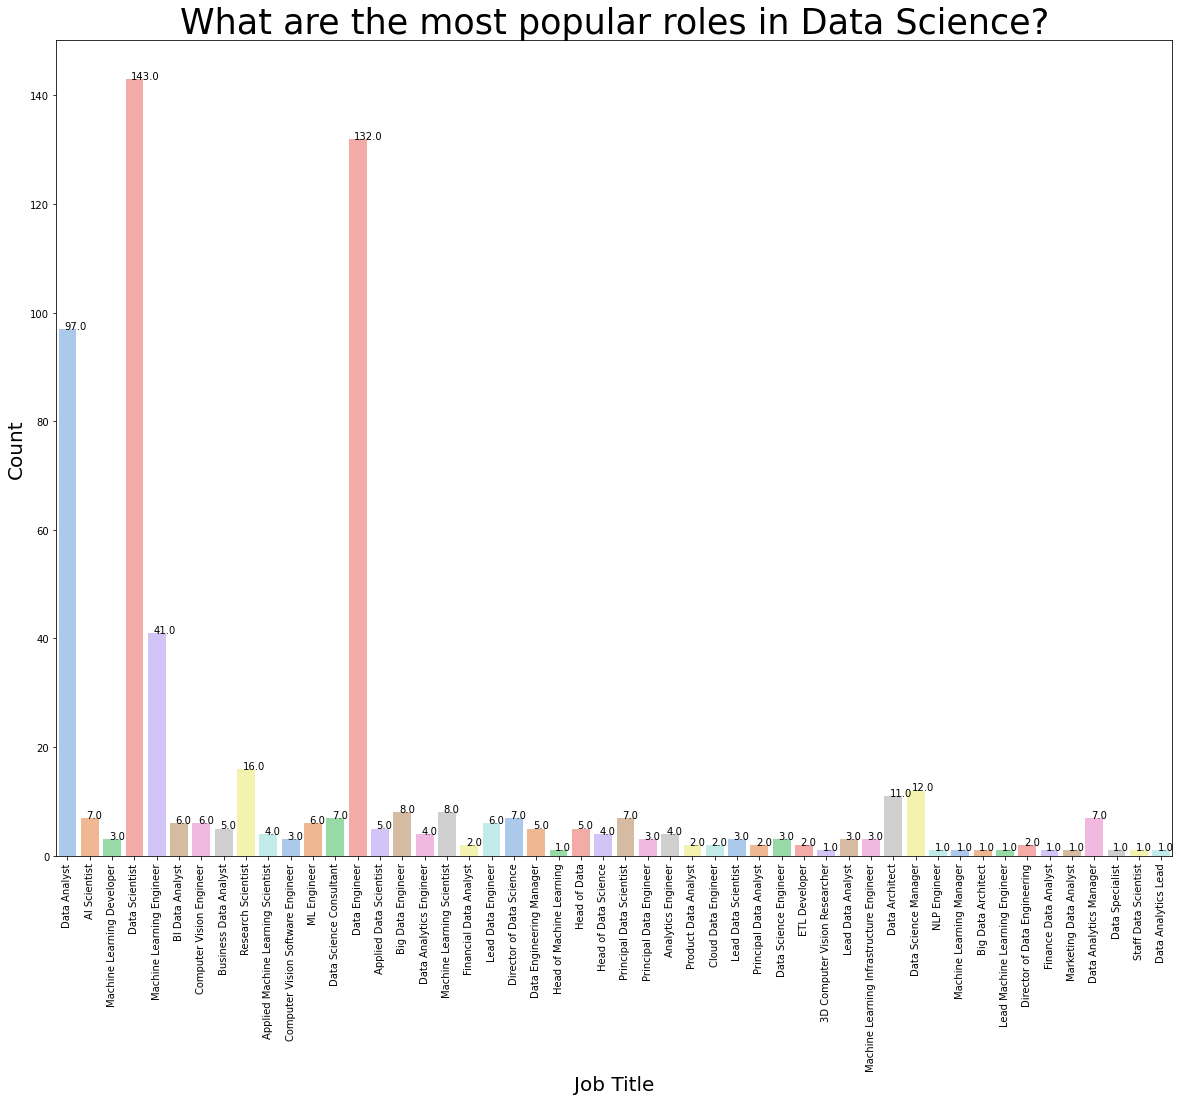

In [4]:
plt.figure(figsize=(20,15))
dl1 = sns.countplot(data=ds, x="job_title", palette = sns.color_palette('pastel')) 
for i in dl1.patches:
    dl1.annotate('{:.1f}'.format(i.get_height()), (i.get_x() + 0.25, i.get_height() + 0.01))
plt.xticks(rotation = 90) #rotates the xtick labels by 90 since by default it will be horizontal
plt.title("What are the most popular roles in Data Science?", fontsize = 35)
plt.xlabel("Job Title", fontsize = 20)
plt.ylabel("Count", fontsize = 20)


plt.show()

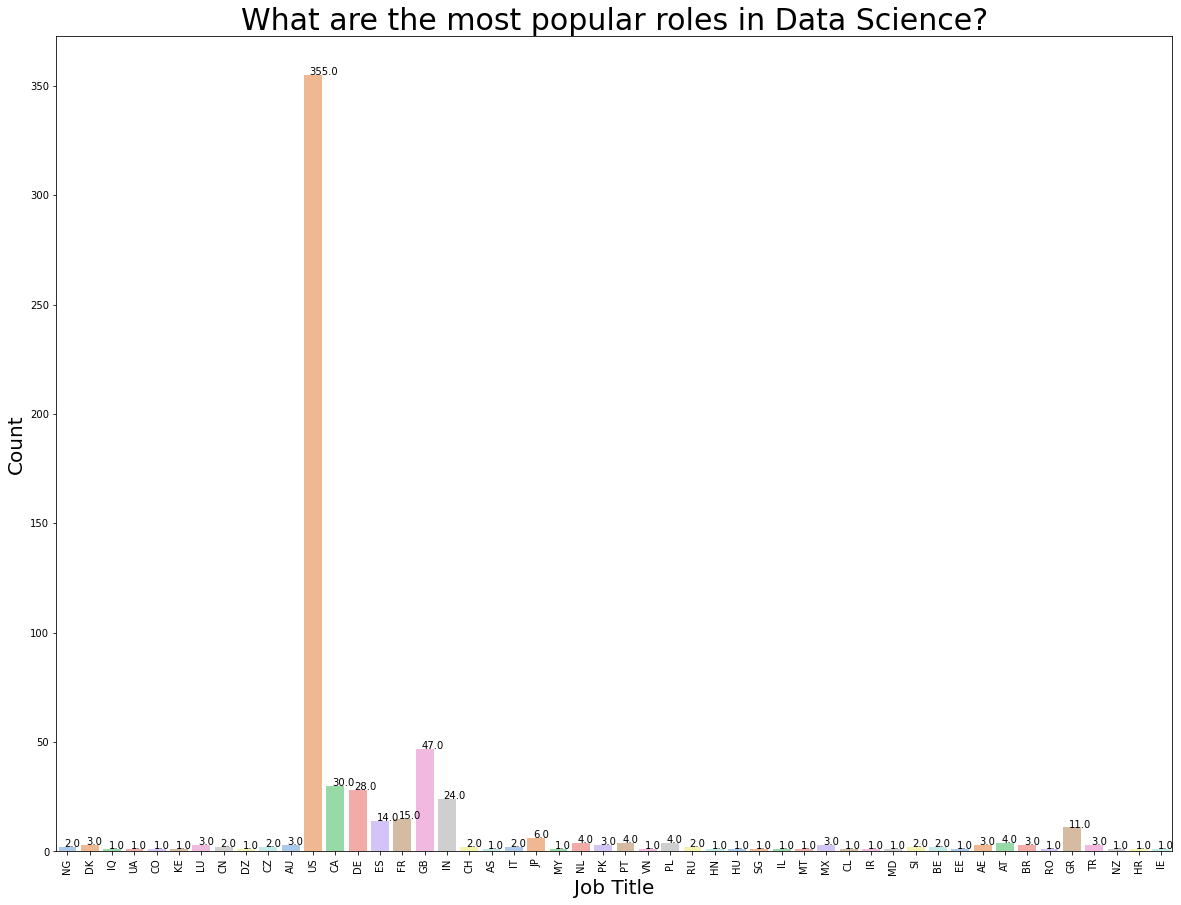

In [15]:
plt.figure(figsize=(20,15))
dl2 = sns.countplot(data=ds, x="company_location", palette = sns.color_palette('pastel')) 
for i in dl2.patches:
    dl2.annotate('{:.1f}'.format(i.get_height()), (i.get_x() + 0.25, i.get_height() + 0.01))
plt.xticks(rotation = 90) #rotates the xtick labels by 90 since by default it will be horizontal
plt.title("What are the most popular roles in Data Science?", fontsize = 30)
plt.xlabel("Job Title", fontsize = 20)
plt.ylabel("Count", fontsize = 20)


plt.show()

C:\Users\adria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


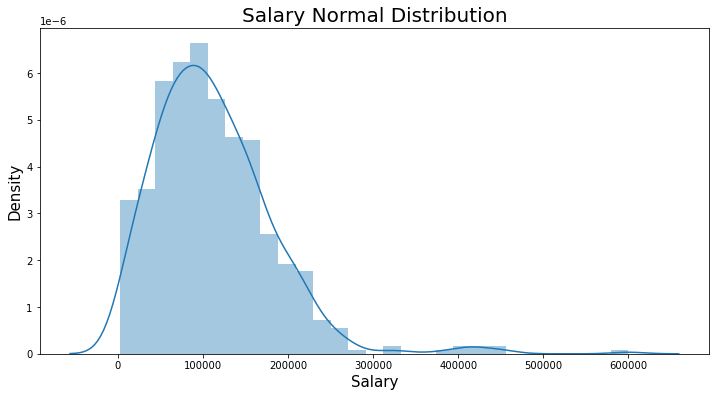

In [16]:
#distribution plot to see which way the skew is 
plt.figure(figsize = (12,6))
sns.distplot(ds['Salary'])
plt.title('Salary Normal Distribution', fontsize=20)
plt.xlabel('Salary', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [17]:
print(ds.describe)


       int64_field_0    work_year         Salary  remote_ratio
count     607.000000   607.000000     607.000000     607.00000
mean      303.000000  2021.405272  112297.869852      70.92257
std       175.370085     0.692133   70957.259411      40.70913
min         0.000000  2020.000000    2859.000000       0.00000
25%       151.500000  2021.000000   62726.000000      50.00000
50%       303.000000  2022.000000  101570.000000     100.00000
75%       454.500000  2022.000000  150000.000000     100.00000
max       606.000000  2022.000000  600000.000000     100.00000


**Observations:**

Based on the normal distribution, the salary is skewed to the right meaning that there is an outlier shifting our overall data from the normal distribution. FOr our case, it would be better to take into consideration the median rather than the mean.

In [18]:
ds.columns

Index(['int64_field_0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'Salary', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

Text(0.5, 1.0, 'Salary Box Plot')

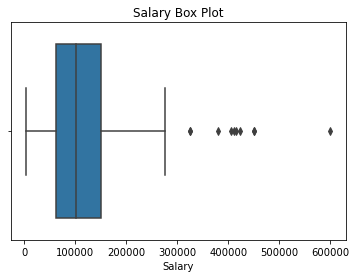

In [21]:
sns.boxplot(x = 'Salary', data = ds)
plt.title('Salary Box Plot')


In [22]:
#Bi-variate Analysis; will be using a function defined by user 

**Bi-Variate Analysis**

In [59]:
def uni_var_plots(data = ds, x = None, xlabel = None,y = None, ylabel = None, palette = None, title = None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    sns.boxplot(data = ds, x=x,ax = ax[0], y = y, palette=palette)
    sns.stripplot(data = ds, x=x,ax = ax[1], y = y, palette = palette)
    ax[0].set_xlabel(xlabel=xlabel, size = 15)
    ax[0].set_ylabel(ylabel=ylabel, size = 15)
    ax[1].set_xlabel(xlabel=xlabel, size = 15)
    ax[1].set_ylabel(ylabel=ylabel, size = 15)
    fig.suptitle(title, fontsize = 20)

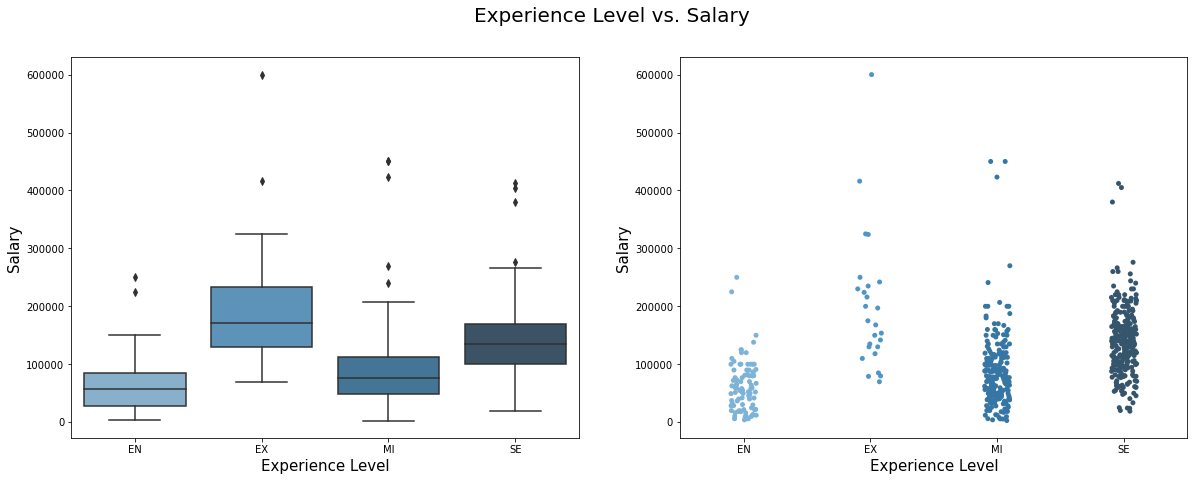

In [61]:
uni_var_plots(x='experience_level', xlabel='Experience Level', y='Salary', ylabel='Salary', palette = 'Blues_d', title = 'Experience Level vs. Salary')

**Observations:**

Based on the box and strip plots, an entry level candidate (or a recent college graduate) has a median annual salary of 50000 dollars. With time added to experience, they could attain a median salarybetween 150000 - 160000 dollars per year. If a data analyst/data scientist were to really put in the elbow grease and go and beyond all work expectations, they could be looking at a max salary of around 600000 dollars.

**Which year did people prefer to work from home?**

Text(33.28686848958334, 0.5, 'Year')

<Figure size 1440x1080 with 0 Axes>

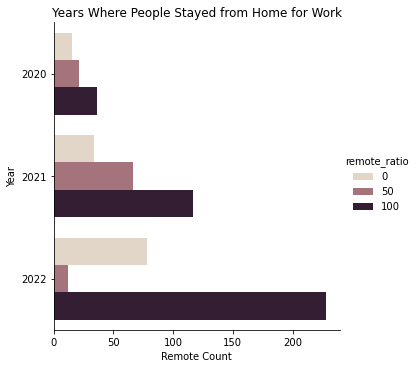

In [9]:
#will be using a catplot in sns which is for categorical values 

plt.figure(figsize = (20,15))
sns.catplot(y='work_year', hue = 'remote_ratio', kind = 'count', palette = 'ch:.25', data = ds)
plt.title('Years Where People Stayed from Home for Work')
plt.xlabel('Remote Count')
plt.ylabel('Year')

**Observations:**

Based on the category plot above, we can see that there is a growing preference towards remote work. It is important to note that this dataset is displaying a major bias towards 2022 data since more than 50% of this data is representative of the year 2022. However, it can still be drawn from the data that more people are setting their preference to remote work. 

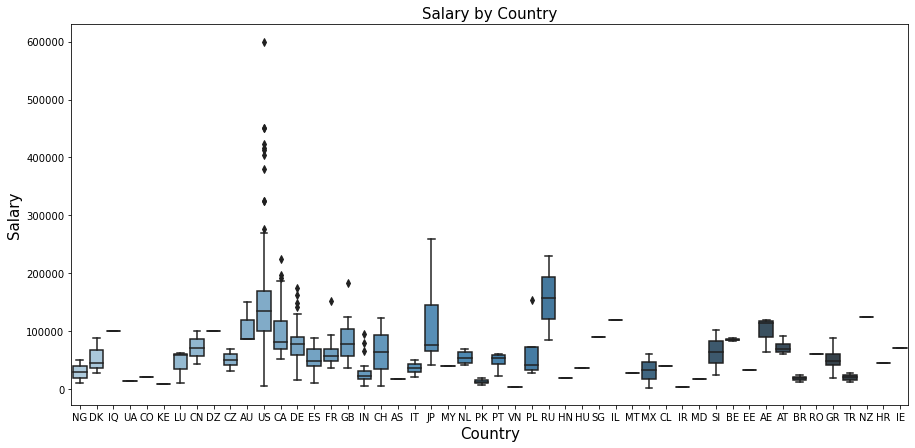

In [8]:
plt.figure(figsize=(15,7))
sns.boxplot(data = ds, x='company_location', y = 'Salary', palette='Blues_d')
plt.xlabel('Country', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('Salary by Country', fontsize=15)
plt.show()